In [1]:
import Bio.PDB as PDB
import os
import itertools
import numpy as np
import json
import itertools
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rc, font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

#H-bond strengths/distance strong 2.2-2.5 medium 2.5-3.2
#Recognised max pipi_distance for pi-pi stacking is 4
Max_OHOH = 3.2
Max_pipi = 4.0

##Designed for testing pdb files containing only Tyr residues (extracted from the original file)
p = PDB.PDBParser()
parent_directory  = "./"
pdb_file_directory = parent_directory+"Complete_biological_units_CC_Tyr/"
save_file_directory_OHOH = parent_directory+"OHOH_test/"
save_file_directory_pipi = parent_directory+"pipi_test/"

In [2]:
PDBS_OHOH = {}
PDBS_pipi = {}

for pdb_entry in os.listdir(pdb_file_directory):
    Distance_OHOH = {}
    Distance_pipi = {}
    if pdb_entry[-3:] != "pdb":
        print(pdb_entry)
        pass
    else:
        structure = p.get_structure(str(pdb_entry), pdb_file_directory+pdb_entry)
        residue_combinations = itertools.combinations(structure.get_residues(), 2)
        pairs_measured = defaultdict(list)
        for residue1, residue2 in residue_combinations:
            ### Some pdb files form permutations instead of combinations, therefore this ensures duplications are filtered out
            pairs_measured[residue1.parent.id+str(residue1.id[1])].append(residue2.parent.id+str(residue2.id[1]))
            if (residue1.parent.id+str(residue1.id[1]) in pairs_measured[residue2.parent.id+str(residue2.id[1])] or 
                residue1.parent.id+str(residue1.id[1]) == residue2.parent.id+str(residue2.id[1])):
                continue
            else:
                residue1_string = [x.id for x in residue1.get_unpacked_list()]
                residue2_string = [x.id for x in residue2.get_unpacked_list()]
                if 'OH' in residue1_string and 'OH' in residue2_string:
                    PDBS_OHOH[pdb_entry+"_"+residue1.parent.id+str(residue1.id[1])+residue2.parent.id+str(residue2.id[1])]=(
                        residue1['OH']-residue2['OH'])
                else:
                    print("Missing OH in "+pdb_entry)
                if 'CG' and 'CZ' in residue1_string and 'CG' and 'CZ' in residue2_string:
                    Ring_center1 = (residue1['CG'].get_coord()+residue1['CZ'].get_coord())/2
                    Ring_center2 = (residue2['CG'].get_coord()+residue2['CZ'].get_coord())/2
                    pipi_value = np.sqrt(np.sum(np.square(Ring_center1-Ring_center2)))
                    PDBS_pipi[pdb_entry+"_"+residue1.parent.id+str(residue1.id[1])+residue2.parent.id+str(residue2.id[1])]=(
                        pipi_value)

Missing OH in 6dkm_CCbiolunit3_TYR.pdb
Missing OH in 6dkm_CCbiolunit3_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 6o7x_CCbiolunit1_TYR.pdb
Missing OH in 5lqy_CCbiolunit1_TYR.pdb
Missing OH in 5lqy_CCbiolunit1_TYR.pdb
Missing OH in 5lqy_CCbiolunit1_TYR.pdb
Missing OH in 6f38_CCbiolunit1_TYR.pdb
Missing OH in 6f38_CCbiolunit1_TYR.pdb
Missing OH in 6f38_CCbiolunit1_TYR.pdb
Missing OH in 6f38_CCbiolunit1_TYR.pdb
Missing OH in 6f38_CCbiolunit1_TYR.pdb
Missing OH in 6f38_CCbiol

Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiol

Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiolunit1_TYR.pdb
Missing OH in 5a9q_CCbiol

Missing OH in 3wuq_CCbiolunit1_TYR.pdb
Missing OH in 3wuq_CCbiolunit1_TYR.pdb
Missing OH in 5j1h_CCbiolunit2_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiolunit1_TYR.pdb
Missing OH in 6bpq_CCbiol

Missing OH in 6ian_CCbiolunit1_TYR.pdb
Missing OH in 6ian_CCbiolunit1_TYR.pdb
Missing OH in 6ian_CCbiolunit1_TYR.pdb
Missing OH in 6ian_CCbiolunit1_TYR.pdb
Missing OH in 6ian_CCbiolunit1_TYR.pdb
Missing OH in 6ian_CCbiolunit1_TYR.pdb
Missing OH in 6ian_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiolunit1_TYR.pdb
Missing OH in 6qle_CCbiol

In [3]:
##Find examples within limit of pi-pi interaction distances and OHOH interaction distances
OHOH_interactions = []
for OHOH_entry in PDBS_OHOH:
    if PDBS_OHOH[OHOH_entry] <= Max_OHOH:
        OHOH_interactions.append(OHOH_entry)

pipi_interactions = []
for pipi_entry in PDBS_pipi:
    if PDBS_pipi[pipi_entry] <= Max_pipi:
        pipi_interactions.append(pipi_entry)

In [4]:
OHOH_interactions

['3klt_CCbiolunit1_TYR.pdb_C291D291',
 '4aya_CCbiolunit1_TYR.pdb_A43B43',
 '3klt_CCbiolunit3_TYR.pdb_C291D291',
 '2gd7_CCbiolunit1_TYR.pdb_A39B39',
 '1ory_CCbiolunit1_TYR.pdb_A1026A1086',
 '2osz_CCbiolunit3_TYR.pdb_A346B346',
 '6jpf_CCbiolunit1_TYR.pdb_A98A102',
 '6jpf_CCbiolunit1_TYR.pdb_B98B102',
 '5hyl_CCbiolunit2_TYR.pdb_B88D88',
 '5eeb_CCbiolunit2_TYR.pdb_E75G75',
 '4h73_CCbiolunit6_TYR.pdb_E75G75',
 '4h73_CCbiolunit6_TYR.pdb_F75H75',
 '2yfd_CCbiolunit2_TYR.pdb_A88B88',
 '2vzb_CCbiolunit1_TYR.pdb_C33D33',
 '5hyl_CCbiolunit1_TYR.pdb_A88C88',
 '2qfc_CCbiolunit1_TYR.pdb_A95A119',
 '4jq5_CCbiolunit3_TYR.pdb_I346J346',
 '4bt8_CCbiolunit1_TYR.pdb_B199B230',
 '5eeb_CCbiolunit1_TYR.pdb_A75C75',
 '5eeb_CCbiolunit1_TYR.pdb_B75D75',
 '4ut1_CCbiolunit1_TYR.pdb_A152A594']

In [5]:
pipi_interactions

['6hed_CCbiolunit1_TYR.pdb_L44M44',
 '5htf_CCbiolunit1_TYR.pdb_A48B48',
 '1zrt_CCbiolunit1_TYR.pdb_C199P199',
 '2gd7_CCbiolunit1_TYR.pdb_A39B39',
 '6iko_CCbiolunit1_TYR.pdb_A251B251',
 '1oh8_CCbiolunit1_TYR.pdb_B446B509',
 '6b02_CCbiolunit1_TYR.pdb_B289B358',
 '2yiu_CCbiolunit1_TYR.pdb_A199D199']

In [16]:
font = {'fontname':'Arial','size' : 14}

params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
fontProperties = {'size' : 15}
rc('font',**fontProperties)

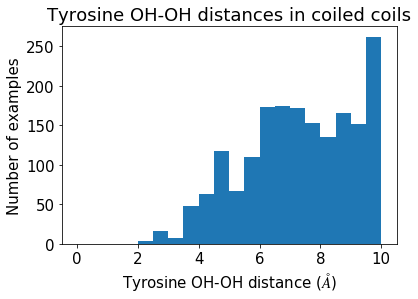

In [21]:
#Plot histogram of OH OH distances up to 10 angstrom
fig1, ax1 = plt.subplots()


ax1.hist(PDBS_OHOH.values(), range=(0,10), bins=20)
ax1.set_xlabel(r'Tyrosine OH-OH distance ($\AA $)')
ax1.set_ylabel(r'Number of examples')
ax1.set_title(r'Tyrosine OH-OH distances in coiled coils')

plt.savefig(parent_directory+"OHOH_histogram.png", bbox_inches='tight', dpi=600)

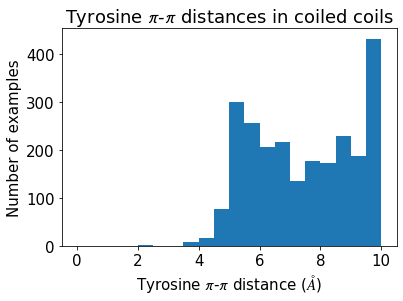

In [24]:
fig3, ax3 = plt.subplots()

ax3.hist(PDBS_pipi.values(), range=(0,10), bins=20)
ax3.set_xlabel(r'Tyrosine $\pi $-$\pi $ distance ($\AA $)')
ax3.set_ylabel(r'Number of examples')
ax3.set_title(r'Tyrosine $\pi $-$\pi $ distances in coiled coils')
plt.savefig(parent_directory+"pipi_histogram.png", bbox_inches='tight', dpi=600)